# Exploratory Data Analysis for Sentiment Classification

## 1. Load Data and Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('IDSMSA.csv')

# Display the first few rows of the dataframe
print("Initial Data:")
print(df.head())

# Check data types and look for missing values
print("\nData Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Initial Data:
                       Tweet Date  \
0  Thu Feb 29 11:21:27 +0000 2024   
1  Thu Feb 29 10:11:05 +0000 2024   
2  Thu Feb 29 10:06:04 +0000 2024   
3  Thu Feb 29 07:42:09 +0000 2024   
4  Thu Feb 29 06:06:17 +0000 2024   

                                            Sentence  Quote Count  \
0         Gk muluk muluk, 100,000 lot saham BBCA aja            0   
1  BCA Expoversary 2024 menawarkan promo suku bun...            0   
2             [USERNAME] saham bca nya menyusul ya 🙂            0   
3  PT Bank BCA Syariah (BCA Syariah) turut memeri...            0   
4  [USERNAME] Begitu byk saham kamu memilih saham...            0   

   Reply Count  Retweet Count  Favorite Count Sentiment  \
0            0              0               0  Positive   
1            0              0               0   Neutral   
2            0              0               0  Positive   
3            0              0               0   Neutral   
4            0              0               1  Positi

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tertius\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tertius\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Sentiment Distribution

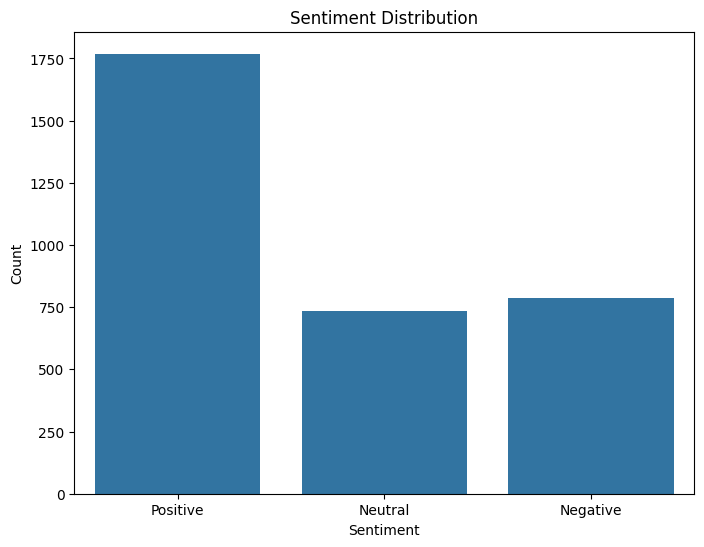

In [2]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## 3. Text Preprocessing

In [3]:
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove usernames
    text = re.sub(r'\@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'\#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

df['Cleaned_Text'] = df['Sentence'].apply(preprocess_text)
print(df[['Sentence', 'Cleaned_Text']].head())

                                            Sentence  \
0         Gk muluk muluk, 100,000 lot saham BBCA aja   
1  BCA Expoversary 2024 menawarkan promo suku bun...   
2             [USERNAME] saham bca nya menyusul ya 🙂   
3  PT Bank BCA Syariah (BCA Syariah) turut memeri...   
4  [USERNAME] Begitu byk saham kamu memilih saham...   

                                        Cleaned_Text  
0           gk muluk muluk 100000 lot saham bbca aja  
1  bca expoversary 2024 menawarkan promo suku bun...  
2                 username saham bca nya menyusul ya  
3  pt bank bca syariah bca syariah memeriahkan bc...  
4  username byk saham memilih saham uangnya gede ...  


## 4. Word Clouds

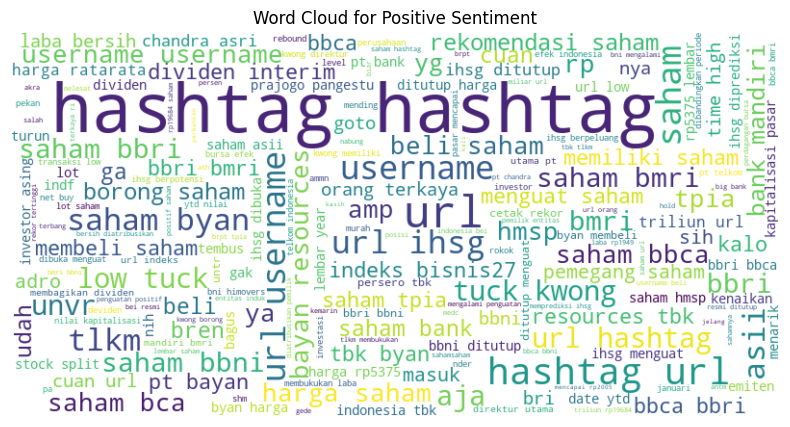

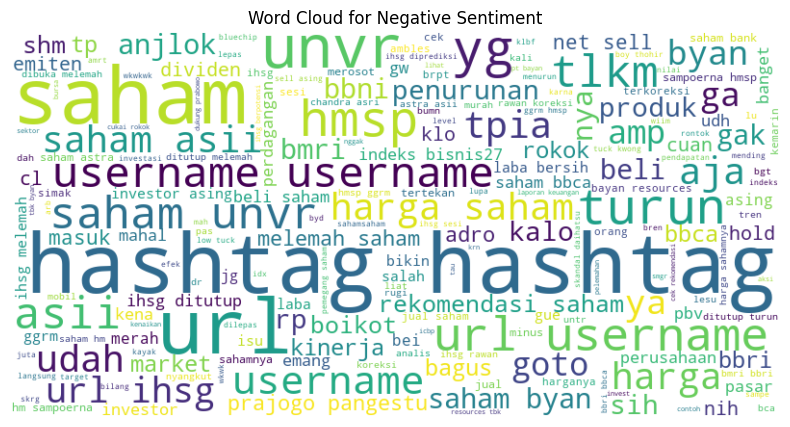

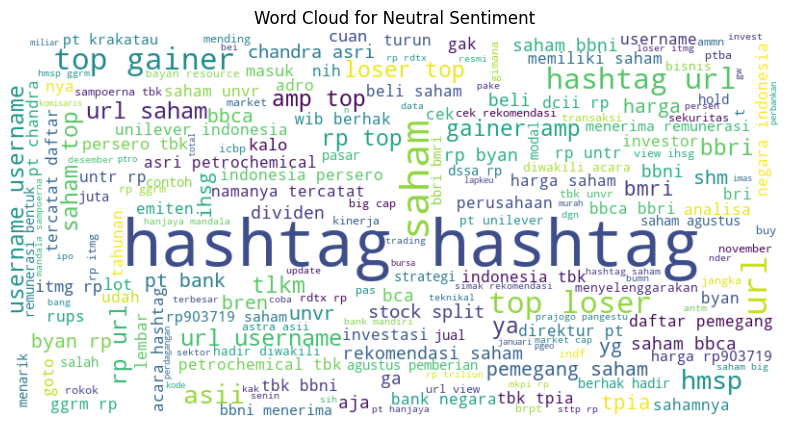

In [4]:
def generate_wordcloud(sentiment):
    text = ' '.join(df[df['Sentiment'] == sentiment]['Cleaned_Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

generate_wordcloud('Positive')
generate_wordcloud('Negative')
generate_wordcloud('Neutral')

## 5. N-gram Analysis

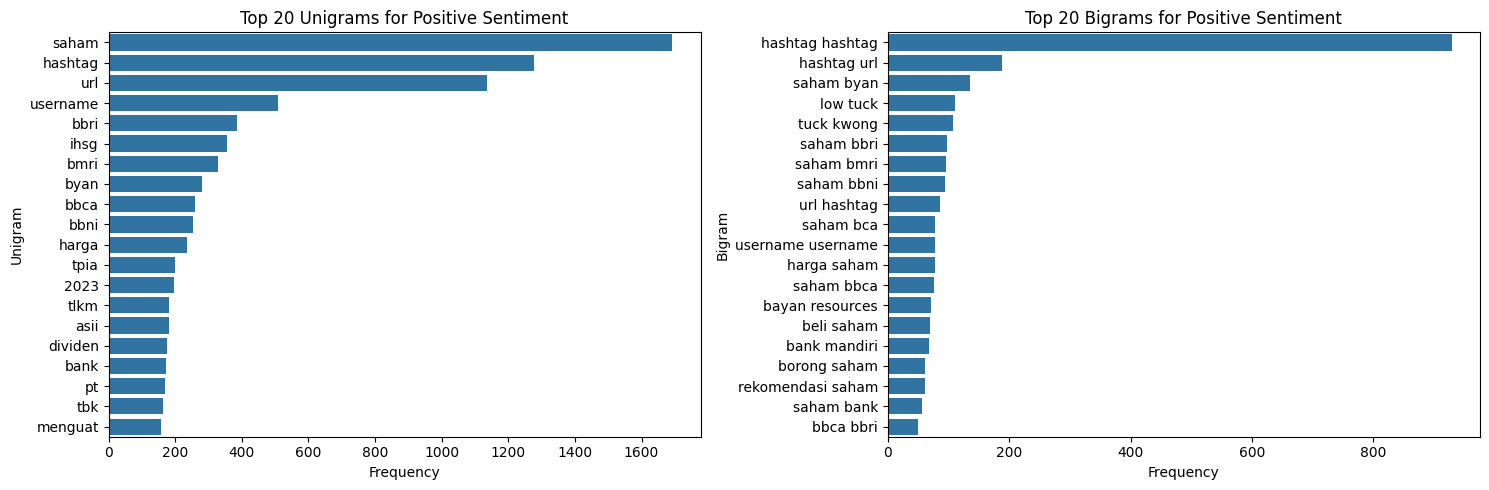

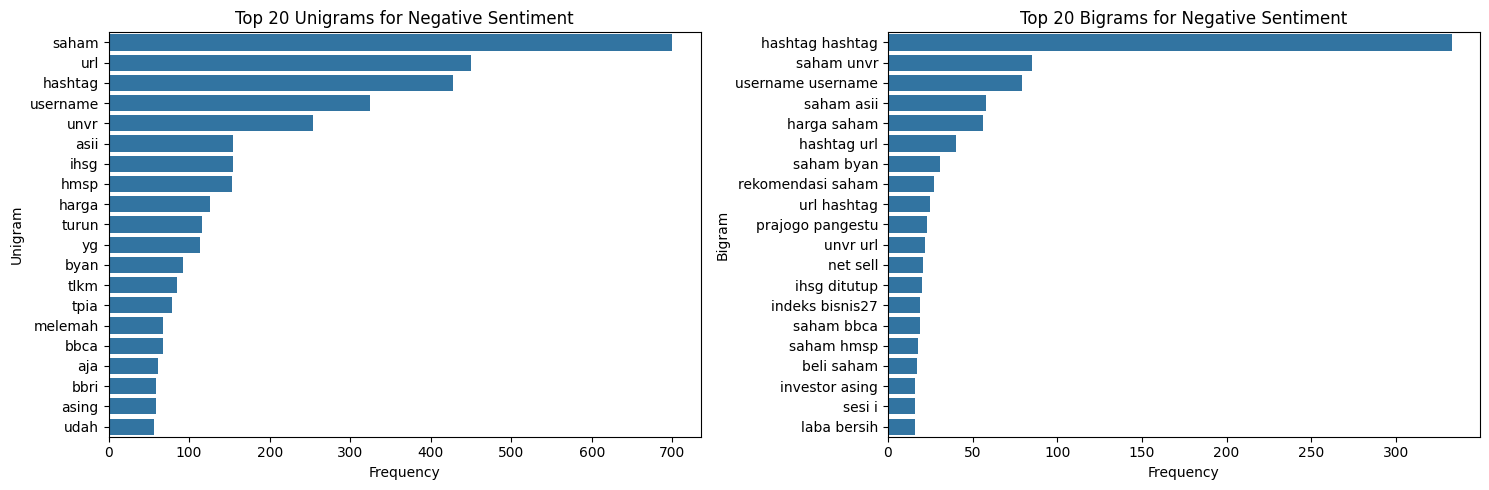

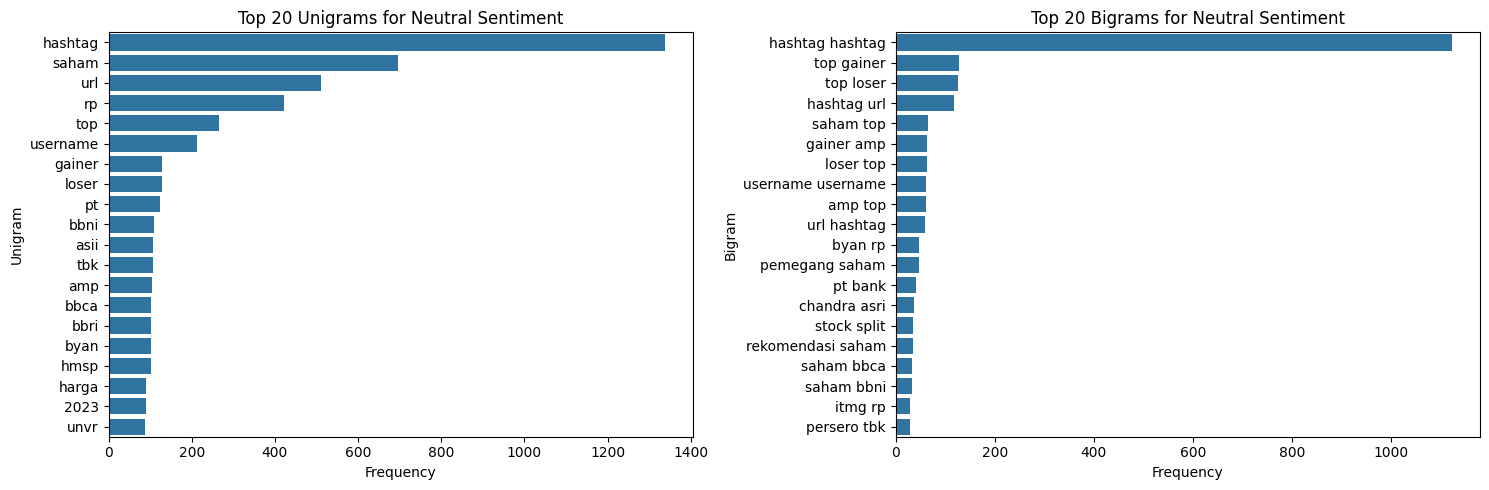

In [5]:
def get_top_n_grams(corpus, n=None, gram=1):
    vec = Counter()
    # Handle cases where the corpus might be empty
    if not corpus.empty:
        for text in corpus:
            tokens = text.split()
            # Ensure there are enough tokens to create the n-gram
            if len(tokens) >= gram:
                ngrams = [tuple(tokens[i:i+gram]) for i in range(len(tokens)-gram+1)]
                vec.update(ngrams)
    return vec.most_common(n)

def plot_top_ngrams(sentiment):
    plt.figure(figsize=(15, 5))
    
    corpus = df[df['Sentiment'] == sentiment]['Cleaned_Text']
    
    # Check if there is data for the sentiment
    if corpus.empty:
        print(f"No data available for {sentiment} sentiment.")
        return

    # Unigrams
    plt.subplot(1, 2, 1)
    top_unigrams = get_top_n_grams(corpus, 20, 1)
    unigram_df = pd.DataFrame(top_unigrams, columns=['Unigram', 'Frequency'])
    
    # FIX: Convert unigram tuples to strings
    unigram_df['Unigram'] = unigram_df['Unigram'].apply(lambda x: x[0])
    
    sns.barplot(x='Frequency', y='Unigram', data=unigram_df)
    plt.title(f'Top 20 Unigrams for {sentiment} Sentiment')
    
    # Bigrams
    plt.subplot(1, 2, 2)
    top_bigrams = get_top_n_grams(corpus, 20, 2)
    bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
    
    # This part was already correct
    bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))
    
    sns.barplot(x='Frequency', y='Bigram', data=bigram_df)
    plt.title(f'Top 20 Bigrams for {sentiment} Sentiment')
    
    plt.tight_layout()
    plt.show()

# Now, running the functions will work correctly
plot_top_ngrams('Positive')
plot_top_ngrams('Negative')
plot_top_ngrams('Neutral')

## 6. Tweet Length Analysis

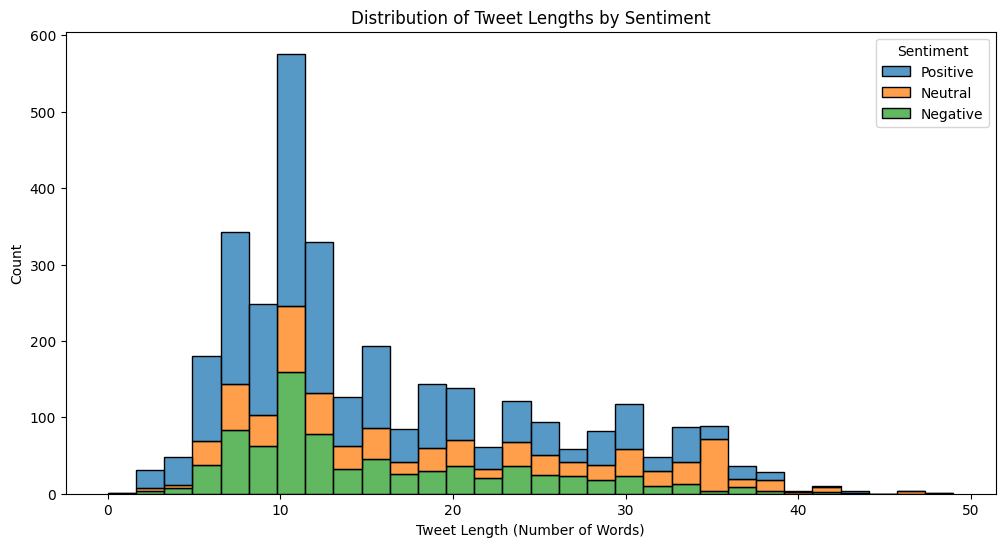

In [6]:
df['Tweet_Length'] = df['Cleaned_Text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Tweet_Length', hue='Sentiment', multiple='stack', bins=30)
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.xlabel('Tweet Length (Number of Words)')
plt.ylabel('Count')
plt.show()